In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', '7d3090f0164e4dd8a3e97835f48cfe50')

In [3]:
gods = 'shiva', 'parvati', 'ganesha', 'muruga', 'nandi', 'vishnu', 'krishna', 'venkateshwara', 'laxmi', 'brahma', 'saraswati', 'durga', 'kali', 'kalabhairava', 'rama', 'hanuman', 'dakshinamurthy'
path = Path('gods')

In [5]:
if not path.exists():
    path.mkdir()
    for o in gods:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('content_url'))


 Download of https://i0.wp.com/vedicfeed.com/wp-content/uploads/2018/07/Shiva-Brahma-Vishnu.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/brahma
$ cd gods/brahma
$ wget -c https://i0.wp.com/vedicfeed.com/wp-content/uploads/2018/07/Shiva-Brahma-Vishnu.jpg
$ tar xf Shiva-Brahma-Vishnu.jpg
 And re-run your code once the download is successful


 Download of https://tamilandvedas.files.wordpress.com/2014/11/museum-brahma.jpg?w=600 has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/brahma
$ cd gods/brahma
$ wget -c https://tamilandvedas.files.wordpress.com/2014/11/museum-brahma.jpg?w=600
$ tar xf museum-brahma.jpg?w=600
 And re-run your code once the download is successful




 Download of https://i0.wp.com/vedicmystics.com/wp-content/uploads/2016/03/Saraswati.gif has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/saraswati
$ cd gods/saraswati
$ wget -c https://i0.wp.com/vedicmystics.com/wp-content/uploads/2016/03/Saraswati.gif
$ tar xf Saraswati.gif
 And re-run your code once the download is successful


 Download of https://www.hindubhagwan.com/img/lord_Saraswati.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/saraswati
$ cd gods/saraswati
$ wget -c https://www.hindubhagwan.com/img/lord_Saraswati.jpg
$ tar xf lord_Saraswati.jpg
 And re-run your code once the download is successful


 Download of https://ascensionacademy.files.wordpress.com/2014/11/goddess-saraswati.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/saraswati
$ cd gods/saraswati
$ wget -c https://ascensionacademy.files.wordpress.com/2014/11/goddess-saraswati.jpg
$ tar xf goddess-saraswati.jpg
 And re-run your code once 


 Download of https://ravi1101.files.wordpress.com/2014/10/001maa-durga.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p gods/durga
$ cd gods/durga
$ wget -c https://ravi1101.files.wordpress.com/2014/10/001maa-durga.jpg
$ tar xf 001maa-durga.jpg
 And re-run your code once the download is successful



In [17]:
fns = get_image_files(path)
fns[0]

Path('gods/shiva/00000000.jpg')

In [7]:
failed = verify_images(fns)
failed

(#44) [Path('gods/parvati/00000004.jpg'),Path('gods/parvati/00000015.jpg'),Path('gods/parvati/00000053.jpg'),Path('gods/parvati/00000060.jpg'),Path('gods/parvati/00000074.jpg'),Path('gods/parvati/00000111.jpg'),Path('gods/parvati/00000103.jpg'),Path('gods/parvati/00000147.jpg'),Path('gods/ganesha/00000111.jpg'),Path('gods/ganesha/00000140.jpg')...]

In [8]:
failed.map(Path.unlink);

In [9]:
gods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = gods.dataloaders(path)

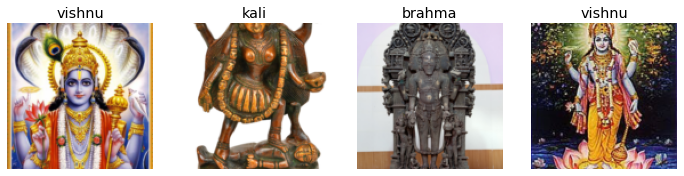

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
gods = gods.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = gods.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,3.499846,1.753111,0.487854,00:17


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.070926,1.556213,0.423077,00:17
1,1.790776,1.374867,0.376518,00:18
2,1.555910,1.261192,0.352227,00:17
3,1.317038,1.177276,0.307692,00:18
4,1.083382,1.104486,0.289474,00:17
5,0.888201,1.064620,0.285425,00:18
6,0.729274,1.112634,0.275304,00:17
7,0.580159,1.107706,0.275304,00:17
8,0.459352,1.133668,0.273279,00:17
9,0.365546,1.113428,0.257085,00:17


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

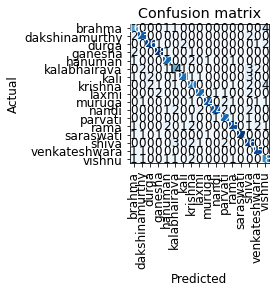

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
learn.export('/notebooks/mybook/models/gods.pkl')

In [23]:
learn_inf = load_learner('/notebooks/mybook/models/gods.pkl')

In [30]:
learn_inf.predict('/notebooks/mybook/images/nithyananda_shiva.jpg')

('shiva',
 tensor(14),
 tensor([1.3946e-06, 2.7798e-06, 1.0041e-06, 4.6323e-07, 1.5429e-07, 7.4095e-04, 1.3553e-04, 2.6716e-07, 2.8840e-06, 4.8579e-07, 7.0475e-08, 2.3909e-05, 1.8566e-08, 4.0033e-06, 9.9906e-01, 2.8686e-07,
         2.2190e-05]))

In [25]:
learn_inf.dls.vocab

(#17) ['brahma','dakshinamurthy','durga','ganesha','hanuman','kalabhairava','kali','krishna','laxmi','muruga'...]